In [1]:
## 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore')
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

## 데이터 Info Check

In [2]:

#데이터셋 로드

customer = pd.read_csv("C:/Users/user/Desktop/이커머스 데이터/Dataset/Customer_info.csv")
discount_info = pd.read_csv("C:/Users/user/Desktop/이커머스 데이터/Dataset/Discount_info.csv")
marketing = pd.read_csv('C:/Users/user/Desktop/이커머스 데이터/Dataset/Marketing_info.csv')
online_sales =pd.read_csv('C:/Users/user/Desktop/이커머스 데이터/Dataset/Onlinesales_info.csv')
tax_info = pd.read_csv("C:/Users/user/Desktop/이커머스 데이터/Dataset/Tax_info.csv")



''' 
#데이터셋 로드

customer = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Customer_info.csv")
discount_info = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Discount_info.csv")
marketing = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Marketing_info.csv")
online_sales =pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Onlinesales_info.csv")
tax_info = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Tax_info.csv")
'''



' \n#데이터셋 로드\n\ncustomer = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Customer_info.csv")\ndiscount_info = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Discount_info.csv")\nmarketing = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Marketing_info.csv")\nonline_sales =pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Onlinesales_info.csv")\ntax_info = pd.read_csv("C:/Users/kdh20/OneDrive/Desktop/123/Dataset/Tax_info.csv")\n'

개인화 상품 추천 알고리즘

Plan - 원하는 완성도 구상, 
Analysis - 데이터 전처리 (추천알고리즘에 필요한), 데이터 특성 파악, 
C
E

In [3]:
online_sales['거래날짜'] = pd.to_datetime(online_sales['거래날짜'])
marketing['날짜'] = pd.to_datetime(marketing['날짜'])

## 문제정의

In [4]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [49]:
customer

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [23]:
marketing

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [2]:
discount_info

NameError: name 'discount_info' is not defined

In [46]:
##
online = online_sales
marketing_1 = marketing

#비용합계 칼럼 추가
marketing_1['마케팅비용'] = marketing_1['오프라인비용'] + marketing_1['온라인비용']

#거래날짜별 판매량 합계
online['거래액'] = online['수량'] * online['평균금액']
online = online.groupby('거래날짜').agg({
                                         '거래액' : 'sum'
}).reset_index()

In [47]:
marketing_1

,날짜,오프라인비용,온라인비용,비용합계,마케팅비용
0,2019-01-01,4500,2424.50,6924.50,6924.50
1,2019-01-02,4500,3480.36,7980.36,7980.36
2,2019-01-03,4500,1576.38,6076.38,6076.38
3,2019-01-04,4500,2928.55,7428.55,7428.55
4,2019-01-05,4500,4055.30,8555.30,8555.30
...,...,...,...,...,...
360,2019-12-27,4000,3396.87,7396.87,7396.87
361,2019-12-28,4000,3246.84,7246.84,7246.84
362,2019-12-29,4000,2546.58,6546.58,6546.58
363,2019-12-30,4000,674.31,4674.31,4674.31


In [48]:
# Plotly 그래프 생성
fig = go.Figure()

# 비용합계 추가
fig.add_trace(go.Scatter(
    x=marketing_1["날짜"],
    y=marketing_1["마케팅비용"],
    mode="lines",
    name="마케팅비용"
))

# 거래액 추가
fig.add_trace(go.Scatter(
    x=online["거래날짜"],
    y=online["거래액"],
    mode="lines",
    name="거래액"
))

# 레이아웃 설정
fig.update_layout(
    title="마케팅비용와 거래액 비교",
    xaxis_title="날짜",
    yaxis_title="값",
    legend_title="종류",
    template="plotly_white"
)

# 그래프 출력
fig.show()

마케팅 비용이 가장 높았던 **1월 5일**, **2월 27일**의 거래액이 그리 크지 않은것을 보았을때, \
마케팅 비용과 거래액은 큰 상관관계가 없어보입니다. 

In [7]:
customer

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


## 결측치 분석

## 이상치 분석

## 데이터 EDA

### Online_sales 데이터

In [9]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


#### 한 유저는 평균 몇종류의 제품을 구매했을까 ?

In [ ]:
category = online_sales.groupby(['고객ID','제품카테고리']).agg({
                                    '제품ID' : lambda x: len(x.unique())
}).reset_index()

top_5 = category.sort_values(by='제품ID', ascending=False).head(50)

top_5

,고객ID,제품카테고리,제품ID
737,USER_0118,Apparel,191
3377,USER_0563,Apparel,171
8168,USER_1355,Apparel,156
4451,USER_0736,Apparel,134
3884,USER_0643,Apparel,115
1205,USER_0202,Apparel,106
577,USER_0094,Apparel,92
2860,USER_0482,Apparel,82
1190,USER_0200,Apparel,79
4064,USER_0667,Apparel,78


In [62]:
apparel = online_sales[online_sales['제품카테고리'] == 'Apparel']
apparel

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,거래액
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65
12,USER_0190,Transaction_0003,2019-01-01,Product_1025,Apparel,5,17.53,6.5,Used,87.65
15,USER_0190,Transaction_0005,2019-01-01,Product_0310,Apparel,1,14.02,6.5,Used,14.02
16,USER_0190,Transaction_0005,2019-01-01,Product_0486,Apparel,1,14.02,6.5,Clicked,14.02
31,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1,61.89,6.5,Clicked,61.89
...,...,...,...,...,...,...,...,...,...,...
52906,USER_0167,Transaction_25048,2019-12-31,Product_0448,Apparel,4,3.47,6.5,Clicked,13.88
52907,USER_0167,Transaction_25048,2019-12-31,Product_0490,Apparel,4,3.47,6.5,Used,13.88
52911,USER_0845,Transaction_25052,2019-12-31,Product_0490,Apparel,1,3.47,6.5,Used,3.47
52912,USER_0845,Transaction_25052,2019-12-31,Product_0754,Apparel,1,16.30,6.5,Used,16.30


In [66]:
apparel['고객ID'].nunique()

1323

In [55]:
category = online_sales.groupby('고객ID').agg({
    '제품카테고리': lambda x: len(x.unique()),  # 고유 값의 개수
    '제품ID': lambda x: len(x.unique())  # 고유 값의 개수
}).reset_index()

print(category)
print(category.describe())

           고객ID  제품카테고리  제품ID
0     USER_0000       2     2
1     USER_0001      10    42
2     USER_0002       6    21
3     USER_0003       4    11
4     USER_0004       7    33
...         ...     ...   ...
1463  USER_1463       4     7
1464  USER_1464      11    35
1465  USER_1465       2     8
1466  USER_1466       1     1
1467  USER_1467      13    69

[1468 rows x 3 columns]
            제품카테고리         제품ID
count  1468.000000  1468.000000
mean      6.053134    25.657357
std       3.188880    27.607047
min       1.000000     1.000000
25%       4.000000     8.000000
50%       6.000000    17.000000
75%       8.000000    34.000000
max      19.000000   308.000000


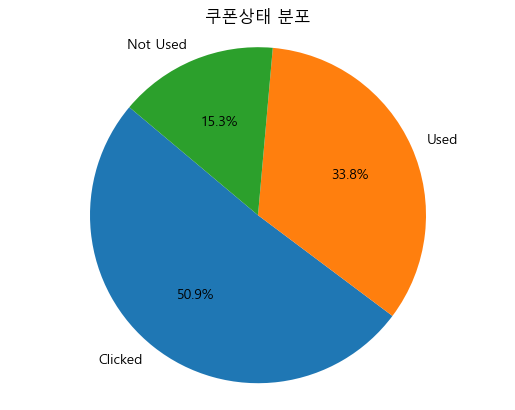

In [5]:
coupon = online_sales['쿠폰상태'].value_counts()

plt.pie(coupon, labels = coupon.index, autopct='%1.1f%%', startangle=140 )
plt.axis('equal')
plt.title('쿠폰상태 분포')
plt.show()

### discount_info 데이터

In [10]:
discount_info

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [14]:
## 월 칼럼 datetime 변환
month_mapping = {
    "Jan": "2019-01", "Feb": "2019-02", "Mar": "2019-03", "Apr": "2019-04",
    "May": "2019-05", "Jun": "2019-06", "Jul": "2019-07", "Aug": "2019-08",
    "Sep": "2019-09", "Oct": "2019-10", "Nov": "2019-11", "Dec": "2019-12"
}

# Apply the mapping and convert to datetime
discount_info['월'] = pd.to_datetime(discount_info['월'].map(month_mapping))

discount_info.head()

,월,제품카테고리,쿠폰코드,할인율
0,2019-01-01,Apparel,SALE10,10
1,2019-02-01,Apparel,SALE20,20
2,2019-03-01,Apparel,SALE30,30
3,2019-01-01,Nest-USA,ELEC10,10
4,2019-02-01,Nest-USA,ELEC20,20


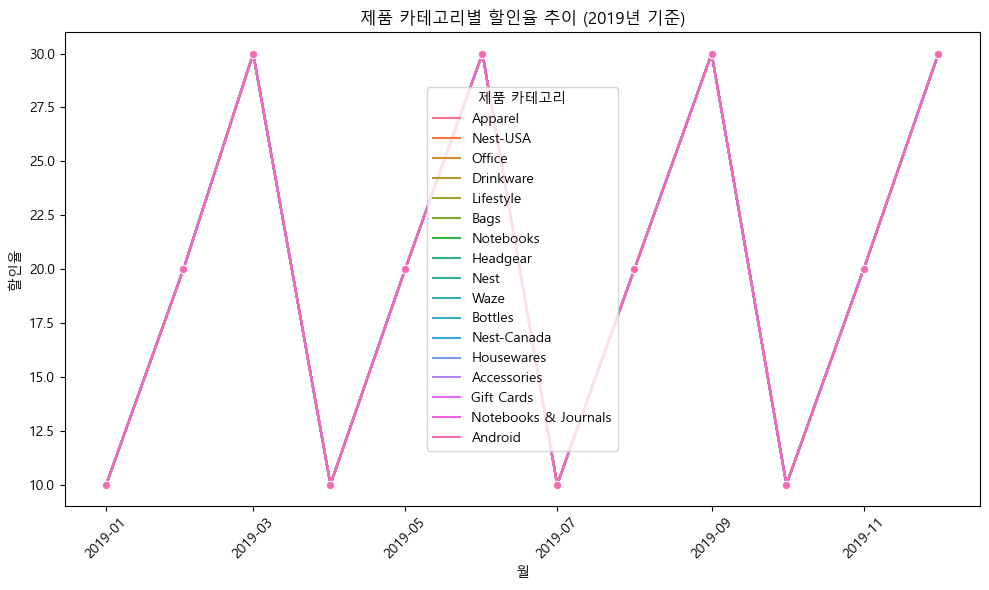

In [16]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create the lineplot
sns.lineplot(data= discount_info, x='월', y='할인율', hue='제품카테고리', marker="o")

# Set the x-axis to display only the month and year
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))

# Add labels and title
plt.xlabel("월")
plt.ylabel("할인율")
plt.title("제품 카테고리별 할인율 추이 (2019년 기준)")

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.legend(title='제품 카테고리')

# Display the plot
plt.tight_layout()
plt.show()

할인율은 
- 1,4,7,10월 10%
- 2,5,8,11월 20%
- 3,6,9,12월 30%

로 모든 카테고리가 고정적인것으로 확인된다.


## customer 데이터프레임

In [17]:
customer

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


### 성별분포

>성비

In [18]:
customer['성별'].value_counts()

여    934
남    534
Name: 성별, dtype: int64

>성별 고객지역 분포

>성별 가입기간 분포

In [6]:
customer['가입기간'].describe()

count    1468.000000
mean       25.912125
std        13.959667
min         2.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: 가입기간, dtype: float64

평균 가입기간은 약 25.9개월이며, 최소 가입기간은 2개월, 최대 가입기간은 50개월 입니다.
\
그렇다면, 가입기간을 3개월 단위로 나누어 히스토그램으로 분포를 나타내어 봅시다.

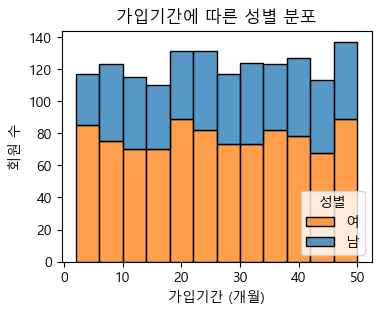

In [ ]:
plt.figure(figsize=(4, 3))

ax = sns.histplot(
    data=customer,
    x='가입기간',
    hue='성별',
    multiple='stack',
    edgecolor='black'
)

ax.legend(title='성별', labels=['여', '남'], loc = 'lower right')
plt.title('가입기간에 따른 성별 분포')
plt.xlabel('가입기간 (개월)')
plt.ylabel('회원 수')

plt.show()

유저들의 가입 기간은 대체로 고른 분포를 보이나 0~5개월 사이 **신규 가입자**의 비율은 여성이 남성보다 약 200% 이상인것으로 보입니다.

### 고객지역 분포

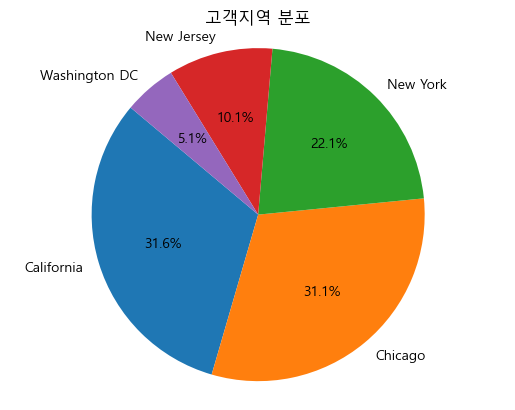

In [21]:
local = customer['고객지역'].value_counts()

plt.pie(local, labels = local.index, autopct='%1.1f%%', startangle=140 )
plt.axis('equal')
plt.title('고객지역 분포')
plt.show()

disco

## 쿠폰 상태에 대한 세부 EDA
- 어떤 카테고리, 제품에 쿠폰을 많이 사용했을까 ?
- 쿠폰을 사용하는 성비는 어떻게 될까 ?
- 쿠폰을 사용했을 경우 구매력을 얼마나 이끌어 내었는가 ?

우선, 쿠폰을 사용한 물건과, 카테고리를 알아보도록 하자.

In [20]:
used = online_sales[online_sales['쿠폰상태'] == 'Used']

product_group = used.groupby(['제품카테고리']).agg({
                                                         '쿠폰상태' : 'count',
                                                         '평균금액' : 'mean'
})

product_group

,쿠폰상태,평균금액
제품카테고리,,
Accessories,77,9.352338
Android,10,15.796000
Apparel,6156,19.779071
Backpacks,27,77.323333
Bags,625,30.136896
Bottles,82,3.467927
Drinkware,1161,10.852920
Fun,52,6.658846
Gift Cards,56,129.410179


Apparel, Drinkware, Nest-USA, Office 카테고리에서 쿠폰을 많이 사용하는것으로 나타났습니다.
\
위 항목들의 어떠한 제품이 쿠폰을 많이 사용하는지 상세하게 알아보도록 합시다.

In [ ]:
used = online_sales[online_sales['쿠폰상태'] == 'Used']
used = used[used['제품카테고리'].isin(['Apparel', 'Drinkware', 'Nest-USA', 'Office'])]

product_group = used.groupby(['제품카테고리','제품ID']).agg({
                                                         '쿠폰상태' : 'count',
                                                         '평균금액' : 'mean'
})

top_3_per_category = (
    product_group
    .sort_values(by='쿠폰상태', ascending=False)  # Sorting by 쿠폰상태 in descending order
    .groupby('제품카테고리', group_keys=False)  # Grouping by 제품카테고리
    .apply(lambda x: x.head(5))  # Selecting top 3 rows per group
)

# Displaying result
top_3_per_category

쿠폰상태        평균금액
제품카테고리    제품ID                          
Apparel   Product_0922   176    9.887898
          Product_0228    84    6.209405
          Product_0206    72    9.658333
          Product_1137    66   10.425000
          Product_0295    53   15.186604
Drinkware Product_0880   192    2.674896
          Product_0892   141   21.664823
          Product_0900   107   11.515701
          Product_0908   104    1.472981
          Product_0894    92    2.741304
Nest-USA  Product_0981  1203  151.056384
          Product_0983  1092  121.907527
          Product_0976  1032  120.223818
          Product_0984   460   79.912370
          Product_0985   394   79.570812
Office    Product_0904   274    2.476861
          Product_1134   156    1.386218
          Product_0969   136    5.332647
          Product_0914   124    0.924677
          Product_0905   114    2.597281

## 남성과 여성이 선호하는 카테고리가 다를까요 ?

In [10]:
customer

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [11]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [12]:
merged_df = pd.merge(
    online_sales,
    customer[['고객ID', '성별']],
    on='고객ID',
    how='left'
)

merged_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여


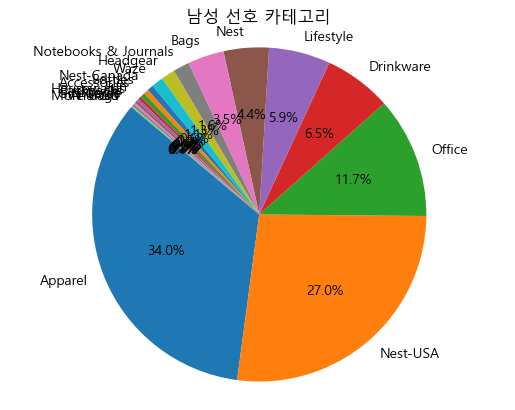

In [14]:
man = merged_df[merged_df['성별'] == '남']
women = merged_df[merged_df['성별'] == '여']

man_pie = man['제품카테고리'].value_counts()
women_pie = women['제품카테고리'].value_counts()


plt.pie(man_pie, labels = man_pie.index, autopct='%1.1f%%', startangle=140 )
plt.axis('equal')
plt.title('남성 선호 카테고리')
plt.show()

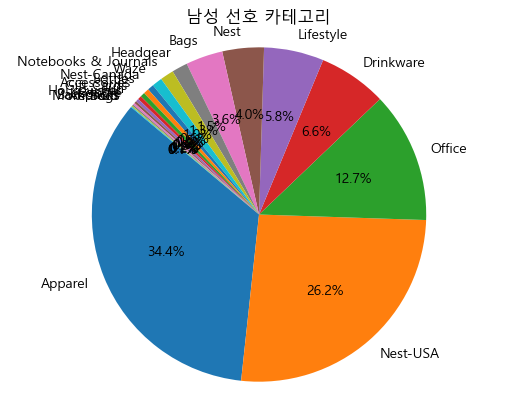

In [15]:
plt.pie(women_pie, labels = women_pie.index, autopct='%1.1f%%', startangle=140 )
plt.axis('equal')
plt.title('남성 선호 카테고리')
plt.show()

선호 카테고리가 거의 비슷합니다.

## 트렌드 기반 추천시스템

### Rule-based recommendation system

Trend를 나타낼 지표 ?

상품의 트렌드를 어떻게 측정할 수 있을까요 ?

이 데이터에서는 판매량, 재구매율을 이용해 월별 상품 트렌드 랭킹을 세웠습니다.

### Dataset 설정

In [6]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


거래 내역 데이터를 우선 일자를 기준으로 제품마다 판매된 수량을 나타내는 피봇 테이블로 전환합니다.

In [7]:
pivot_table = online_sales.pivot_table(index='거래날짜', columns='제품ID', values='수량', aggfunc='sum', fill_value=0)
pivot_table

제품ID,Product_0000,Product_0001,Product_0002,Product_0003,Product_0004,Product_0005,Product_0006,Product_0007,Product_0008,Product_0009,...,Product_1135,Product_1136,Product_1137,Product_1138,Product_1139,Product_1140,Product_1141,Product_1142,Product_1143,Product_1144
거래날짜,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,26,0,0
2019-01-02,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2019-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,29,0
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,21,0,0,0,0,0,1,0
2019-01-05,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> 재구매율 설정

데이터프레임을 고객ID, 제품ID, 거래날짜 기준으로 정렬합니다.
고객ID: 동일 고객의 데이터를 그룹화.
제품ID: 같은 고객의 동일 상품 구매를 묶음.
거래날짜: 시간 순으로 정렬하여 이전 구매를 먼저 확인 가능하게 만듦.

In [ ]:
rebuy = online_sales.sort_values(by=['고객ID', '제품ID', '거래날짜'])

# 재구매 여부를 계산하는 함수
def calculate_repurchase(df):
    df['재구매'] = 0  # 초기화
    # 같은 고객-상품 조합에서 이전 구매가 있는 경우 재구매로 표시
    df['재구매'] = df.duplicated(subset=['고객ID', '제품ID'], keep='first').astype(int)
    return df

# 재구매 여부 추가
rebuy = calculate_repurchase(rebuy)
rebuy


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,재구매
38120,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.0,Used,0
38125,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.0,Used,0
44638,USER_0001,Transaction_20187,2019-11-02,Product_0104,Apparel,1,5.25,6.0,Not Used,0
44643,USER_0001,Transaction_20190,2019-11-02,Product_0182,Accessories,1,2.99,6.0,Clicked,0
44626,USER_0001,Transaction_20179,2019-11-01,Product_0195,Lifestyle,3,3.19,6.0,Clicked,0
...,...,...,...,...,...,...,...,...,...,...
29393,USER_1467,Transaction_13450,2019-07-29,Product_1096,Apparel,1,31.35,6.0,Clicked,1
41578,USER_1467,Transaction_18608,2019-10-10,Product_1133,Bottles,1,2.50,6.0,Clicked,0
29363,USER_1467,Transaction_13438,2019-07-29,Product_1134,Office,1,1.99,6.0,Clicked,0
41579,USER_1467,Transaction_18608,2019-10-10,Product_1134,Office,1,1.00,6.0,Clicked,1


거래 내역 데이터를 일자를 기준으로 제품마다 재구매를 나타내는 피봇 테이블로 전환합니다.

In [9]:
pivot_table2 = rebuy.pivot_table(index='거래날짜', columns='제품ID', values='재구매', aggfunc='sum', fill_value=0)
pivot_table2

제품ID,Product_0000,Product_0001,Product_0002,Product_0003,Product_0004,Product_0005,Product_0006,Product_0007,Product_0008,Product_0009,...,Product_1135,Product_1136,Product_1137,Product_1138,Product_1139,Product_1140,Product_1141,Product_1142,Product_1143,Product_1144
거래날짜,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


이제 데이터를 월별로 취합하고, 계산식을 도입합니다.

In [10]:
# 거래날짜 인덱스를 DatetimeIndex로 변환
pivot_table.index = pd.to_datetime(pivot_table.index, errors='coerce')

# 거래날짜를 월 단위로 변환하여 새로운 열 추가
pivot_table['월'] = pivot_table.index.to_period('M')

# 월별로 그룹화하여 합산
monthly_pivot = pivot_table.groupby('월').sum()
monthly_pivot

제품ID,Product_0000,Product_0001,Product_0002,Product_0003,Product_0004,Product_0005,Product_0006,Product_0007,Product_0008,Product_0009,...,Product_1135,Product_1136,Product_1137,Product_1138,Product_1139,Product_1140,Product_1141,Product_1142,Product_1143,Product_1144
월,,,,,,,,,,,,,,,,,,,,,
2019-01,5,0,0,3,2,0,0,1,3,0,...,7,25,39,5,0,14,12,156,345,42
2019-02,2,0,1,1,0,0,0,2,1,1,...,12,1,8,4,0,1,51,25,135,21
2019-03,0,5,3,4,7,3,2,10,7,3,...,75,5,71,40,0,0,90,19,225,12
2019-04,0,1,1,2,1,2,1,5,2,1,...,0,6,302,51,0,3,264,95,200,210
2019-05,0,2,2,2,1,0,4,8,1,4,...,0,0,242,11,0,6,115,150,218,76
2019-06,0,1,1,4,1,0,1,4,0,2,...,0,1,109,57,0,15,81,0,216,0
2019-07,8,1,2,2,0,2,0,2,2,3,...,0,0,238,0,0,166,384,0,91,0
2019-08,405,1,2,1,4,1,3,3,3,1,...,0,0,67,0,0,41,429,0,12,0
2019-09,95,1,2,6,0,0,4,2,2,1,...,0,0,8,0,0,0,62,0,0,0


In [11]:
# 거래날짜 인덱스를 DatetimeIndex로 변환
pivot_table2.index = pd.to_datetime(pivot_table2.index, errors='coerce')

# 거래날짜를 월 단위로 변환하여 새로운 열 추가
pivot_table2['월'] = pivot_table2.index.to_period('M')

# 월별로 그룹화하여 합산
monthly_pivot2 = pivot_table2.groupby('월').sum()
monthly_pivot2

제품ID,Product_0000,Product_0001,Product_0002,Product_0003,Product_0004,Product_0005,Product_0006,Product_0007,Product_0008,Product_0009,...,Product_1135,Product_1136,Product_1137,Product_1138,Product_1139,Product_1140,Product_1141,Product_1142,Product_1143,Product_1144
월,,,,,,,,,,,,,,,,,,,,,
2019-01,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,6,0
2019-02,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2019-03,0,0,0,0,0,0,0,0,0,0,...,2,0,3,0,0,0,1,0,2,0
2019-04,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,2,0
2019-05,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,1,3,0
2019-06,0,0,0,0,0,0,0,0,0,0,...,0,1,5,0,0,0,0,0,4,0
2019-07,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2019-08,0,0,0,0,0,0,0,0,1,0,...,0,0,7,0,0,0,1,0,0,0
2019-09,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


마지막으로, 계산식을 통해 최종 점수를 구하고 rating을 매깁니다.

In [20]:
from sklearn.preprocessing import StandardScaler

def normalize(df):
    """
    MinMaxScaler를 사용하여 데이터프레임 정규화.

    Args:
        df (pd.DataFrame): 정규화할 데이터프레임.

    Returns:
        pd.DataFrame: 정규화된 데이터프레임.
    """
    scaler = StandardScaler()
    normalized_array = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(normalized_array, index=df.index, columns=df.columns)
    return normalized_df

# 판매량 데이터프레임 정규화
normalized_sales = normalize(monthly_pivot)
normalized_reduce = normalize(monthly_pivot2)


def calculate_metric(normalized_sales_df, normalized_repurchase_df, weight_sales=0.7, weight_repurchase=0.3):
    """
    두 데이터프레임을 입력받아 가중치를 적용한 계산 결과를 반환하는 함수.

    Args:
        normalized_sales_df (pd.DataFrame): 정규화된 판매량 데이터프레임.
        normalized_repurchase_df (pd.DataFrame): 정규화된 재구매 데이터프레임.
        weight_sales (float): 판매량 가중치. 기본값은 0.5.
        weight_repurchase (float): 재구매 가중치. 기본값은 0.5.

    Returns:
        pd.DataFrame: 계산식 결과 데이터프레임.
    """
    return weight_sales * normalized_sales_df + weight_repurchase * normalized_repurchase_df

# 함수 사용 예시
final_metric = calculate_metric(normalized_sales, normalized_reduce)

In [21]:
final_metric

제품ID,Product_0000,Product_0001,Product_0002,Product_0003,Product_0004,Product_0005,Product_0006,Product_0007,Product_0008,Product_0009,...,Product_1135,Product_1136,Product_1137,Product_1138,Product_1139,Product_1140,Product_1141,Product_1142,Product_1143,Product_1144
월,,,,,,,,,,,,,,,,,,,,,
2019-01,-0.370741,-0.845185,-0.596938,-0.186389,0.000000,-0.516984,-0.603988,-0.739330,0.110575,-0.771550,...,0.292367,2.131638,-0.590061,-0.391365,-0.301511,-0.100368,-0.022304,1.345158,2.086310,0.142078
2019-02,-0.389459,-0.845185,-0.497799,-0.646879,-0.648074,-0.516984,-0.603988,-0.586653,-0.492510,-0.330664,...,0.462448,-0.310966,-0.797315,0.660642,-0.301511,-0.301105,-0.526421,-0.236328,-0.129394,-0.108297
2019-03,-0.401937,1.459865,-0.299520,0.043856,1.620185,1.033969,-0.046461,0.634761,1.316745,0.551107,...,3.086537,0.096134,-0.020635,0.778846,-0.301511,-0.316546,0.355104,-0.308763,0.731586,-0.215601
2019-04,-0.401937,-0.384175,-0.497799,-0.416634,-0.324037,0.516984,-0.325224,-0.128623,-0.190968,-0.330664,...,-0.426817,0.197910,1.523745,1.146626,-0.301511,-0.270222,0.504194,0.608741,0.578571,2.145082
2019-05,-0.401937,0.076835,-0.398659,-0.416634,-0.324037,-0.516984,0.511067,0.329408,-0.492510,0.991993,...,-0.426817,-0.412742,1.478094,-0.190757,-0.301511,-0.223899,-0.216752,2.358165,0.843805,0.547448
2019-06,-0.401937,-0.384175,-0.497799,0.043856,-0.324037,-0.516984,-0.325224,-0.281299,-0.794052,0.110221,...,-0.426817,0.774475,0.470410,1.347233,-0.301511,-0.084927,-0.381264,-0.538139,0.986627,-0.358673
2019-07,0.452962,-0.384175,-0.398659,-0.416634,-0.648074,0.516984,-0.603988,-0.586653,-0.190968,0.551107,...,-0.426817,-0.412742,0.858874,-0.558537,-0.301511,2.246706,1.084823,-0.538139,-0.398700,-0.358673
2019-08,2.125011,-0.384175,-0.398659,-0.646879,0.648074,0.000000,0.232303,-0.433976,1.196016,-0.330664,...,-0.426817,-0.412742,0.426605,-0.558537,-0.301511,0.316546,1.995379,-0.538139,-0.882227,-0.358673
2019-09,0.995788,-0.384175,-0.398659,1.589787,-0.648074,-0.516984,0.511067,-0.586653,-0.190968,-0.330664,...,-0.426817,-0.412742,-0.797315,-0.558537,-0.301511,-0.316546,-0.473196,-0.538139,-0.955674,-0.358673


In [45]:
def top_n_variables_by_month(df, n=5):
    """
    월별로 가장 높은 값을 가진 상위 N개의 변수를 추출.

    Args:
        df (pd.DataFrame): 데이터프레임 (인덱스는 월, 열은 변수들).
        n (int): 추출할 변수의 개수 (기본값은 5).

    Returns:
        pd.DataFrame: 월별 상위 N개의 변수와 값.
    """
    # 각 월별로 상위 N개의 변수와 값을 추출
    top_n = df.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
    top_n_values = df.apply(lambda row: row.nlargest(n).values.tolist(), axis=1)
    
    # 결과를 데이터프레임으로 반환
    result = pd.DataFrame({'Top Variables': top_n, 'Top Values': top_n_values})
    return result

# 월별로 가장 높은 값을 가진 상위 5개 변수 추출
top_5_variables = top_n_variables_by_month(final_metric, n=5)
top_5_variables

,Top Variables,Top Values
월,,
2019-01,"[Product_0924, Product_0981, Product_0834, Pro...","[3.228421373182278, 2.6824595298099663, 2.4784..."
2019-02,"[Product_0977, Product_0876, Product_0466, Pro...","[3.266288830774318, 3.106719371966223, 2.90612..."
2019-03,"[Product_1135, Product_1132, Product_1042, Pro...","[3.0865373336496185, 2.9160014200708653, 2.822..."
2019-04,"[Product_1048, Product_0933, Product_0377, Pro...","[3.3166247903553994, 3.0856781166100964, 2.985..."
2019-05,"[Product_0289, Product_0399, Product_0281, Pro...","[3.1659229066155903, 3.1084243136553757, 3.053..."
2019-06,"[Product_0817, Product_0218, Product_0988, Pro...","[3.154218139862296, 2.5913741154490673, 2.5423..."
2019-07,"[Product_0199, Product_0734, Product_0941, Pro...","[3.3087168322680887, 3.279777468318605, 3.2783..."
2019-08,"[Product_0314, Product_0174, Product_0260, Pro...","[3.3166247903553994, 3.255642209512172, 3.2372..."
2019-09,"[Product_0578, Product_0600, Product_0522, Pro...","[3.216597154905832, 3.135181440277603, 3.04197..."


### 성능 평가

In [46]:
product = online_sales.groupby('제품ID')['제품카테고리'].first().reset_index()

product

,제품ID,제품카테고리
0,Product_0000,Notebooks & Journals
1,Product_0001,Apparel
2,Product_0002,Apparel
3,Product_0003,Apparel
4,Product_0004,Apparel
...,...,...
1140,Product_1140,Notebooks & Journals
1141,Product_1141,Notebooks & Journals
1142,Product_1142,Notebooks & Journals
1143,Product_1143,Office


In [47]:
# Step 1: 제품 ID-카테고리 매핑 딕셔너리 생성
id_to_category = product.set_index('제품ID')['제품카테고리'].to_dict()
id_to_category

# Step 2: Topvariables의 각 ID를 카테고리로 변환
top_5_variables['Top Variables'] = top_5_variables['Top Variables'].apply(
    lambda ids: [id_to_category.get(product_id, 'Unknown') for product_id in ids])

print(top_5_variables)

                                             Top Variables  \
월                                                            
2019-01  [Headgear, Nest-USA, Lifestyle, Nest-USA, Appa...   
2019-02   [Nest-USA, Drinkware, Apparel, Apparel, Apparel]   
2019-03   [Headgear, Drinkware, Apparel, Apparel, Apparel]   
2019-04      [Apparel, Office, Apparel, Apparel, Headgear]   
2019-05   [Apparel, Apparel, Apparel, Gift Cards, Apparel]   
2019-06  [Apparel, Apparel, Nest-Canada, Apparel, Apparel]   
2019-07  [Notebooks & Journals, Apparel, Office, Appare...   
2019-08  [Gift Cards, Lifestyle, Apparel, Drinkware, Ap...   
2019-09      [Apparel, Apparel, Apparel, Apparel, Apparel]   
2019-10  [Gift Cards, Apparel, Apparel, Apparel, Gift C...   
2019-11  [Apparel, Apparel, Apparel, Apparel, Accessories]   
2019-12    [Apparel, Apparel, Apparel, Drinkware, Apparel]   

                                                Top Values  
월                                                           
2019-01  

눈으로만 봤을때는 골고르 잘 추천한 것 같다.